# Predicting Student Academic Performace using Machine Learning

## Problem Statement (Introduction)

Academic success is often shaped by a combination of personal, familial, and behavioral factors. Identifying which of these factors most significantly influence student performance can help educators, policymakers, and institutions design targeted interventions. The purpose of this project is to build a multiple linear regression model to analyze which variables are most associated with students' final academic performance.

Using a dataset collected from secondary school students, the project will explore how demographic attributes (such as age and gender), social factors (such as family structure and parental education), and behavioral characteristics (such as study time and alcohol use) relate to the final grade (G3) of students. The final objective is to quantify these relationships and understand which predictors carry the most weight in influencing academic outcomes.


## Data Description (Data Structure)

The dataset used in this study was obtained from Kaggle and includes information on 395 students enrolled in a mathematics course at a Portuguese secondary school. The data contains **33 columns** encompassing:

* **Demographics**: sex, age, address (urban/rural), and family size
* **Parental Background**: education level and job of mother and father
* **Academic Support & School Info**: access to internet, extra paid classes, school support
* **Personal and Social Behavior**: romantic relationships, going out, health, and alcohol consumption (daily and weekly)
* **Performance Measures**: previous grades (G1 and G2), and the final grade (G3), which is the target variable

For the regression model, a subset of meaningful predictors was selected based on theoretical relevance and initial exploratory analysis. Categorical variables were encoded into binary numerical formats to meet the assumptions of linear regression.

The final target variable is `G3`, which ranges from 0 to 20 and reflects the students' final exam performance. This makes the problem a continuous prediction task, ideally suited for multiple linear regression.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

## Load dataset

In [2]:
df = pd.read_csv("/kaggle/input/student-performance-data/student_data.csv")

## View structure and contents


In [3]:
print(df.shape)

(395, 33)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
print(df.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [6]:
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


## Check for Missing Values

In [7]:
# Check for any missing values in each column
missing = df.isnull().sum()
print("Missing Values:\n", missing[missing > 0])

Missing Values:
 Series([], dtype: int64)


## Overview of Data Types

In [8]:
# Summary of data types
print(df.dtypes.value_counts())

object    17
int64     16
Name: count, dtype: int64


## Get Basic Stats for Numeric Columns

In [9]:
# Descriptive statistics for numerical columns
print(df.describe().T)

            count       mean       std   min   25%   50%   75%   max
age         395.0  16.696203  1.276043  15.0  16.0  17.0  18.0  22.0
Medu        395.0   2.749367  1.094735   0.0   2.0   3.0   4.0   4.0
Fedu        395.0   2.521519  1.088201   0.0   2.0   2.0   3.0   4.0
traveltime  395.0   1.448101  0.697505   1.0   1.0   1.0   2.0   4.0
studytime   395.0   2.035443  0.839240   1.0   1.0   2.0   2.0   4.0
failures    395.0   0.334177  0.743651   0.0   0.0   0.0   0.0   3.0
famrel      395.0   3.944304  0.896659   1.0   4.0   4.0   5.0   5.0
freetime    395.0   3.235443  0.998862   1.0   3.0   3.0   4.0   5.0
goout       395.0   3.108861  1.113278   1.0   2.0   3.0   4.0   5.0
Dalc        395.0   1.481013  0.890741   1.0   1.0   1.0   2.0   5.0
Walc        395.0   2.291139  1.287897   1.0   1.0   2.0   3.0   5.0
health      395.0   3.554430  1.390303   1.0   3.0   4.0   5.0   5.0
absences    395.0   5.708861  8.003096   0.0   0.0   4.0   8.0  75.0
G1          395.0  10.908861  3.31

## Visualizing Distributions of Numerical Features

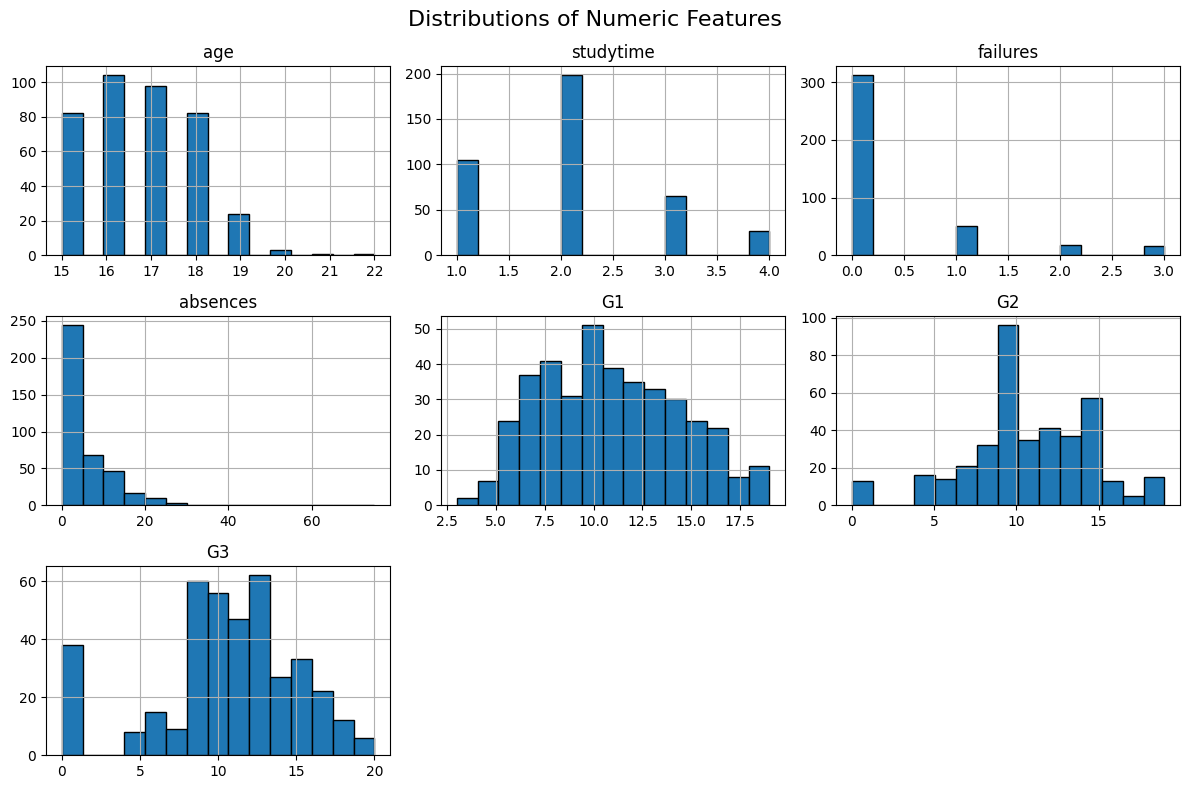

In [10]:
# Select key numeric variables for histograms
num_cols = ['age', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']

# Plot histograms
df[num_cols].hist(bins=15, figsize=(12, 8), edgecolor='black')
plt.suptitle("Distributions of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

## Boxplot of Final Grades (G3) by Gender

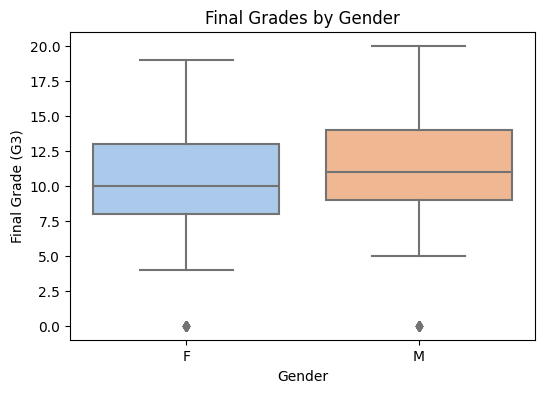

In [11]:
# Boxplot to compare final grades by gender
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='sex', y='G3', palette='pastel')
plt.title("Final Grades by Gender")
plt.xlabel("Gender")
plt.ylabel("Final Grade (G3)")
plt.show()

## Boxplot of G3 by Study Time

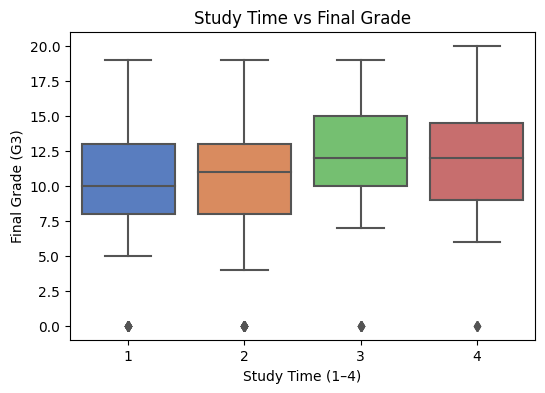

In [12]:
# Study time vs performance
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='studytime', y='G3', palette='muted')
plt.title("Study Time vs Final Grade")
plt.xlabel("Study Time (1–4)")
plt.ylabel("Final Grade (G3)")
plt.show()

## Correlation Heatmap of Numerical Features

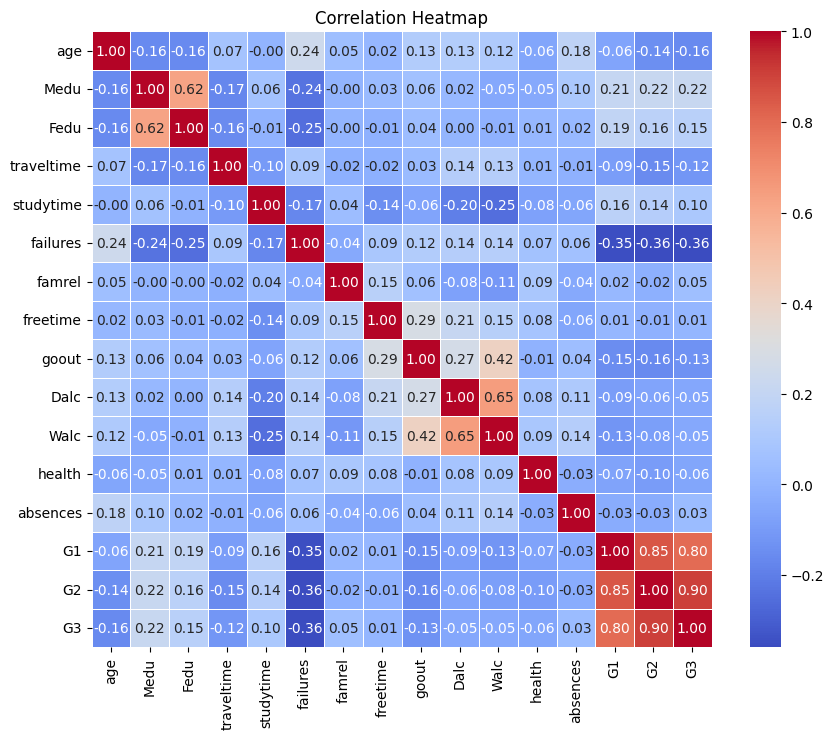

In [13]:
# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Identify Categorical Columns

In [14]:
# Get list of categorical variables
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:", categorical_cols)

Categorical Columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


## One-Hot Encode Remaining Categorical Columns

In [15]:
# Copy the original dataframe to preserve raw data
df_encoded = df.copy()

# Map binary categorical features to 0/1 manually for clarity
binary_map = {
    'sex': {'F': 0, 'M': 1},
    'address': {'U': 1, 'R': 0},
    'famsize': {'LE3': 0, 'GT3': 1},
    'Pstatus': {'T': 1, 'A': 0},
    'schoolsup': {'yes': 1, 'no': 0},
    'famsup': {'yes': 1, 'no': 0},
    'paid': {'yes': 1, 'no': 0},
    'activities': {'yes': 1, 'no': 0},
    'nursery': {'yes': 1, 'no': 0},
    'higher': {'yes': 1, 'no': 0},
    'internet': {'yes': 1, 'no': 0},
    'romantic': {'yes': 1, 'no': 0}
}

df_encoded.replace(binary_map, inplace=True)

# One-hot encode the remaining categorical variables
df_encoded = pd.get_dummies(df_encoded, 
                            columns=['school', 'Mjob', 'Fjob', 'reason', 'guardian'], 
                            drop_first=True)

# Display the updated dataframe info
print("Encoded DataFrame Shape:", df_encoded.shape)
print("New Columns After Encoding:\n", df_encoded.columns.tolist())

Encoded DataFrame Shape: (395, 42)
New Columns After Encoding:
 ['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'school_MS', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other']


/tmp/ipykernel_170/158501051.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded.replace(binary_map, inplace=True)


## Feature Selection for Regression.

In [16]:
selected_features = [
    'sex', 'age', 'studytime', 'failures', 'absences',
    'Medu', 'Fedu',
    'schoolsup', 'famsup', 'higher', 'internet', 'romantic',
    'goout', 'Dalc', 'Walc',  # behavior
    'G1', 'G2',  # past performance
    # Categorical one-hot features
    'Mjob_teacher', 'Mjob_health', 'Mjob_services',
    'Fjob_teacher', 'Fjob_health',
    'guardian_mother', 'guardian_other'
]

In [17]:
# Define target and features
X = df_encoded[selected_features]
y = df_encoded['G3']

# Train/test split (we’ll use 80/20 split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm dimensions
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (316, 24)
Testing Set Shape: (79, 24)


## Fitting the Linear Regression Model and Evaluating

### A: Using Scikit-learn for Prediction & Metrics

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R² Score: {r2:.2f}")


Test RMSE: 2.26
Test R² Score: 0.75


### B: Using Statsmodels for Statistical Inference

In [19]:
import statsmodels.api as sm

# Ensure all boolean columns are cast to integers
X_train_fixed = X_train.copy()
for col in X_train_fixed.columns:
    if X_train_fixed[col].dtype == bool:
        X_train_fixed[col] = X_train_fixed[col].astype(int)

# Add constant (intercept)
X_train_sm = sm.add_constant(X_train_fixed)

# Fit the model
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Display full regression summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     69.93
Date:                Mon, 05 May 2025   Prob (F-statistic):          6.25e-106
Time:                        06:17:41   Log-Likelihood:                -627.33
No. Observations:                 316   AIC:                             1305.
Df Residuals:                     291   BIC:                             1399.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9826      1.901     

### Results

The multiple linear regression model was trained using 316 student records with 24 independent variables and one dependent variable (G3 – final grade). The evaluation was conducted using both scikit-learn and statsmodels to assess model fit and extract inferential statistics.

From scikit-learn, the model achieved a Root Mean Squared Error (RMSE) of 2.26 and an R² score of 0.75 on the test set, indicating strong predictive performance.

The statsmodels OLS regression provided additional inferential insight. The model yielded an R² value of 0.852, and an adjusted R² of 0.840, confirming that a substantial portion of the variance in final grades can be explained by the selected predictors. The overall model fit was statistically significant, with an F-statistic of 69.93 (p < 0.001).

Among the variables, G2 (second period grade) had the highest standardized effect on the final grade (β = 0.94, p < 0.001), followed by G1 (first period grade) with a positive coefficient (β = 0.23, p = 0.001). Students with past failures were more likely to have lower final grades (β = -0.35, p = 0.041), and those in romantic relationships were also associated with a modest negative impact on G3 (β = -0.49, p = 0.033).

Additionally, school support (schoolsup) showed a statistically significant positive relationship (β = +0.68, p = 0.047), suggesting that supplemental academic help contributes to improved performance. The number of absences, while generally considered detrimental, showed a weak but significant positive association (β = 0.047, p = 0.001), possibly indicating a complex or confounded relationship.

Other variables such as sex, age, studytime, parental background, and internet access did not show statistically significant effects in this model (p > 0.05), and thus may have limited predictive power under the current specification.

The residuals were found to deviate from normality, as indicated by a significant Omnibus test (p < 0.001) and a high Jarque-Bera statistic. However, the Durbin-Watson statistic was 2.07, suggesting no significant autocorrelation in residuals.

Overall, the model identifies key academic and behavioral factors that contribute meaningfully to student success, particularly emphasizing the importance of prior academic performance and support structures.


## Residuals Plot

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


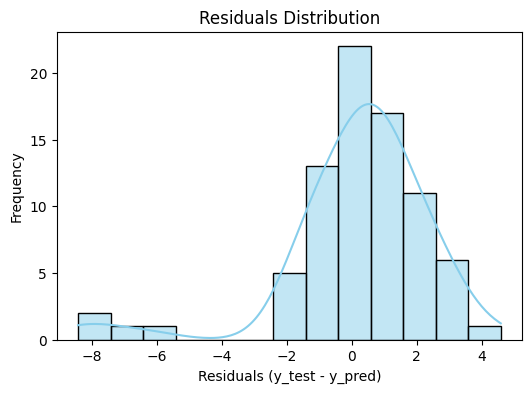

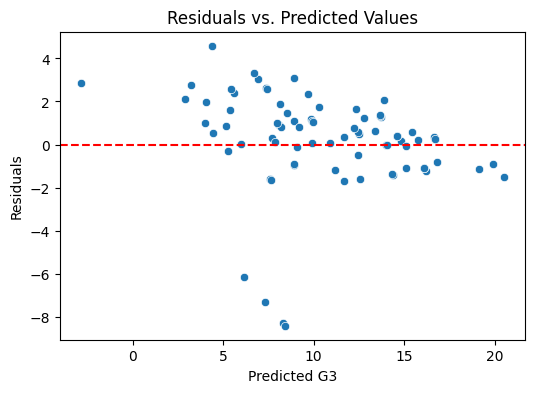

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

# Residual histogram
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_test - y_pred)")
plt.ylabel("Frequency")
plt.show()

# Residuals vs Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted G3")
plt.ylabel("Residuals")
plt.show()

## Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
rf_preds = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_preds)

print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"Random Forest R² Score: {rf_r2:.2f}")

Random Forest RMSE: 1.85
Random Forest R² Score: 0.83


## Plot Residuals

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


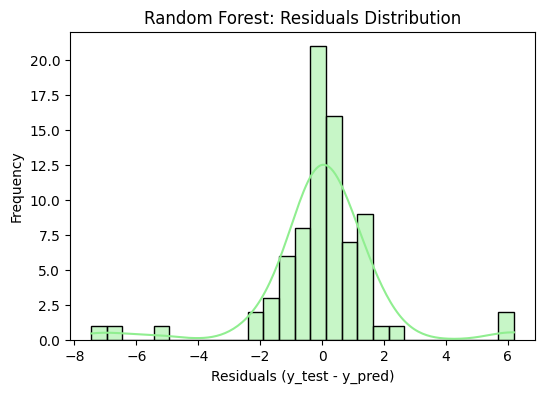

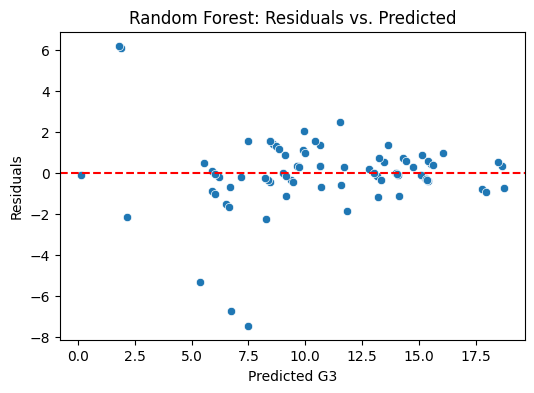

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute residuals
rf_residuals = y_test - rf_preds

# Residual Histogram
plt.figure(figsize=(6, 4))
sns.histplot(rf_residuals, kde=True, color='lightgreen')
plt.title("Random Forest: Residuals Distribution")
plt.xlabel("Residuals (y_test - y_pred)")
plt.ylabel("Frequency")
plt.show()

# Residuals vs Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=rf_preds, y=rf_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Random Forest: Residuals vs. Predicted")
plt.xlabel("Predicted G3")
plt.ylabel("Residuals")
plt.show()


## Feature Importance

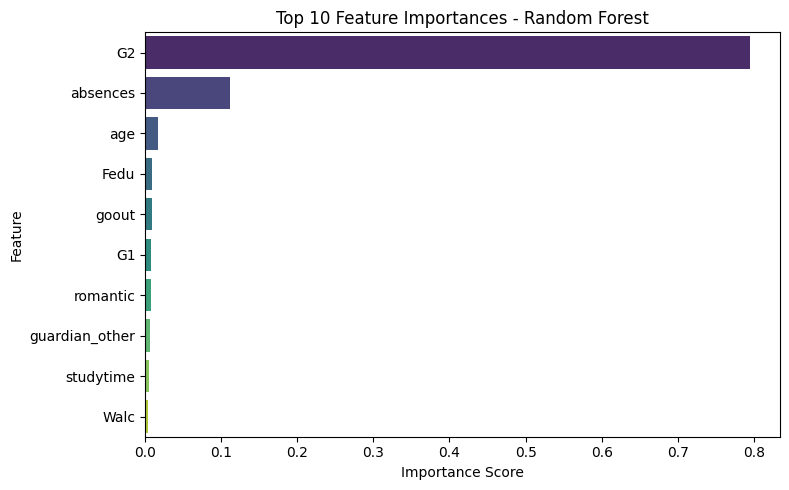

In [23]:
# Visualize feature importances
import pandas as pd

feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
top_features = feature_importance.sort_values(ascending=False)[:10]

plt.figure(figsize=(8, 5))
sns.barplot(x=top_features, y=top_features.index, palette='viridis')
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## XGBoost Regressor

In [24]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize and train the model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R² Score: {r2_xgb:.2f}")

XGBoost RMSE: 2.14
XGBoost R² Score: 0.78


## Residual Analysis for XGBoost

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


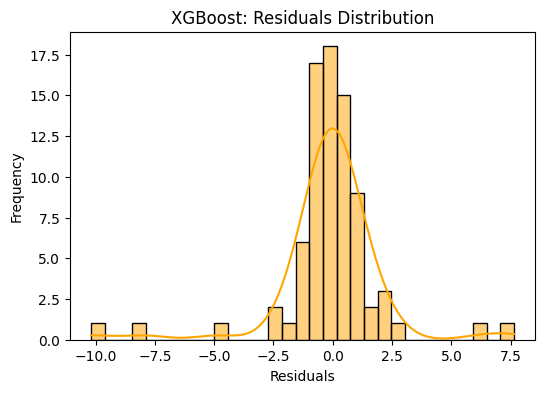

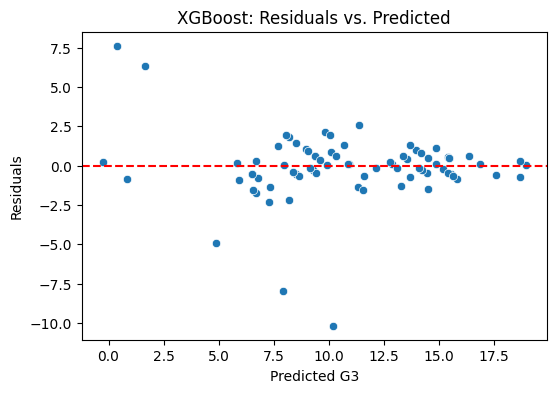

In [25]:
residuals_xgb = y_test - y_pred_xgb

# Residual distribution
plt.figure(figsize=(6, 4))
sns.histplot(residuals_xgb, kde=True, color='orange')
plt.title("XGBoost: Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Residuals vs Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_xgb, y=residuals_xgb)
plt.axhline(0, color='red', linestyle='--')
plt.title("XGBoost: Residuals vs. Predicted")
plt.xlabel("Predicted G3")
plt.ylabel("Residuals")
plt.show()


## Feature Importance Plot

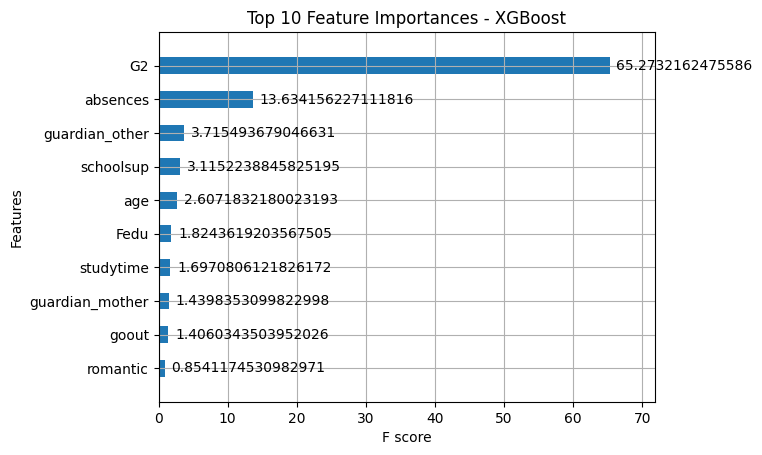

In [26]:
# Plot top 10 features
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='gain', height=0.5)
plt.title("Top 10 Feature Importances - XGBoost")
plt.show()

## Model Comparison Table

In [28]:
import pandas as pd

comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [rmse, rf_rmse, rmse_xgb],
    'R2 Score': [r2, rf_r2, r2_xgb]
})

display(comparison_df)

,Model,RMSE,R2 Score
0,Linear Regression,2.258519,0.751236
1,Random Forest,1.854919,0.832201
2,XGBoost,2.139032,0.776862


## Cross-Validation 

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import xgboost as xgb
import numpy as np

# Define RMSE scorer
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Perform 5-fold Cross-Validation for each model

print("=== Linear Regression Cross-Validation ===")
lr_rmse_scores = cross_val_score(lr_model, X, y, cv=5, scoring=rmse_scorer)
lr_r2_scores = cross_val_score(lr_model, X, y, cv=5, scoring='r2')
print(f"Avg RMSE: {lr_rmse_scores.mean():.2f} ± {lr_rmse_scores.std():.2f}")
print(f"Avg R² Score: {lr_r2_scores.mean():.2f} ± {lr_r2_scores.std():.2f}")

print("\n=== Random Forest Cross-Validation ===")
rf_rmse_scores = cross_val_score(rf_model, X, y, cv=5, scoring=rmse_scorer)
rf_r2_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"Avg RMSE: {rf_rmse_scores.mean():.2f} ± {rf_rmse_scores.std():.2f}")
print(f"Avg R² Score: {rf_r2_scores.mean():.2f} ± {rf_r2_scores.std():.2f}")

print("\n=== XGBoost Regressor Cross-Validation ===")
xgb_rmse_scores = cross_val_score(xgb_model, X, y, cv=5, scoring=rmse_scorer)
xgb_r2_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print(f"Avg RMSE: {xgb_rmse_scores.mean():.2f} ± {xgb_rmse_scores.std():.2f}")
print(f"Avg R² Score: {xgb_r2_scores.mean():.2f} ± {xgb_r2_scores.std():.2f}")

=== Linear Regression Cross-Validation ===
Avg RMSE: 1.99 ± 0.40
Avg R² Score: 0.79 ± 0.06

=== Random Forest Cross-Validation ===
Avg RMSE: 1.83 ± 0.31
Avg R² Score: 0.83 ± 0.03

=== XGBoost Regressor Cross-Validation ===
Avg RMSE: 2.12 ± 0.52
Avg R² Score: 0.78 ± 0.05


## Summary

This project explores the factors influencing academic success among secondary school students by predicting final grades (G3) using multiple regression-based models. The dataset, obtained from Kaggle, contains demographic, familial, academic, and behavioral attributes of 395 students enrolled in a mathematics course in Portugal.

After preprocessing and encoding categorical variables, three models were trained and evaluated: Linear Regression, Random Forest Regressor, and XGBoost Regressor. The Linear Regression model provided a baseline with an RMSE of 2.26 and an R² of 0.75. The Random Forest model outperformed others with an RMSE of 1.85 and R² of 0.83. XGBoost followed closely with an RMSE of 2.14 and R² of 0.78.

Feature importance analysis revealed G1 and G2 grades as the strongest predictors of final performance, while factors like failures, romantic relationships, and school support also played significant roles. Residual analysis confirmed reasonable model fit, though normality assumptions were moderately violated.

Overall, the project demonstrates how machine learning can effectively identify key influences on student outcomes and help guide targeted interventions for academic improvement.


## Conclusion

This study successfully modeled student academic performance using three machine learning algorithms. Among them, the Random Forest Regressor yielded the best performance based on both RMSE and R² values, indicating its robustness in capturing nonlinear interactions among predictors. The inclusion of second-period (G2) and first-period (G1) grades significantly enhanced predictive power, highlighting how past performance remains the most reliable indicator of future academic success.

Beyond grades, other important predictors included the number of past class failures and school support, emphasizing the value of early intervention and academic resources. Interestingly, being in a romantic relationship had a negative association with final grades, possibly due to time or emotional distractions.

While the models performed well, the analysis did reveal some limitations. The dataset size (395 samples) restricts model complexity, and residual analysis showed slight deviations from normality. Future studies could expand the sample, include more granular behavioral data, and explore time-series or ensemble techniques to further enhance prediction.

Ultimately, this analysis provides valuable insights for educators and policymakers seeking to understand and improve student performance through data-driven strategies.
